In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import glob
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os

def beep(n=1, type='Blow'):
    for i in range(n):
        os.system(f'afplay /System/Library/Sounds/{type}.aiff')

color_1 = '#100118'
color_2 = '#FAFAFA'
color_3 = '#6704FF'

c_3 = '#310268'
c_4 = '#4D04B1'
c_5 = '#B7B1FF'
c_6 = '#ECEBFF'

In [41]:
def hex_to_rgb(hex_color):
    """Convert hex color to RGB tuple."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    """Convert RGB tuple to hex color."""
    return '#{:02x}{:02x}{:02x}'.format(*rgb_color)

def generate_gradient(start_color, end_color, num_values):
    """Generate a gradient list of colors."""
    start_rgb = hex_to_rgb(start_color)
    end_rgb = hex_to_rgb(end_color)
    gradient = [
        rgb_to_hex(
            (
                int(start_rgb[0] + (float(i)/(num_values-1)) * (end_rgb[0] - start_rgb[0])),
                int(start_rgb[1] + (float(i)/(num_values-1)) * (end_rgb[1] - start_rgb[1])),
                int(start_rgb[2] + (float(i)/(num_values-1)) * (end_rgb[2] - start_rgb[2]))
            )
        ) for i in range(num_values)
    ]
    return gradient

# Define start and end colors
end_color = '#310268'
start_color = '#ECEBFF'

# Generate a list of 20 colors in the gradient
gradient_colors = generate_gradient(start_color, end_color, 20)

# Print the gradient colors
gradient_colors

['#ecebff',
 '#e2def7',
 '#d8d2ef',
 '#cec6e7',
 '#c4b9df',
 '#baadd7',
 '#b0a1cf',
 '#a795c7',
 '#9d88bf',
 '#937cb7',
 '#8970af',
 '#7f64a7',
 '#75579f',
 '#6c4b97',
 '#623f8f',
 '#583387',
 '#4e267f',
 '#441a77',
 '#3a0e6f',
 '#310268']

In [43]:
run_w_short  = pd.read_csv('offline_final_short.csv')
run_w_short['days'] = 30
run_long = pd.read_csv('offline_final.csv')

In [44]:
run_long['days'] = 180
all_runs = pd.concat([run_w_short, run_long])
all_runs.drop_duplicates(inplace=True)

In [79]:
H = all_runs[all_runs['Model'] == 'reranker']
CF = all_runs[all_runs['Model'] == 'cf']
MC = all_runs[all_runs['Model'] == 'bridges']

In [57]:
H.sort_values('MRR', ascending=False)
print(H[['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3).to_latex(index=False))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
reranker & frequencyScoreNormalizedLog2 & 0.100000 & 0.900000 & 20 & 20 & 30 & 0.239576 & 0.555585 & 0.203201 & 0.215188 & 0.208334 & 0.371307 \\
reranker & frequencyScoreNormalizedLog2 & 0.100000 & 0.900000 & 20 & 50 & 30 & 0.234072 & 0.545252 & 0.202209 & 0.221611 & 0.205652 & 0.305261 \\
reranker & frequencyScoreNormalizedLog2 & 0.100000 & 0.900000 & 10 & 20 & 30 & 0.231489 & 0.439061 & 0.268387 & 0.310902 & 0.267551 & 0.316638 \\
\bottomrule
\end{tabular}



In [59]:
CF.sort_values('MRR', ascending=False)
print(CF [['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(7).to_latex(index=False))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
cf & not_used & 1.000000 & 0.000000 & 20 & 100 & 180 & 0.008216 & 0.036334 & 0.074506 & 0.092920 & 0.073352 & 0.478433 \\
cf & not_used & 1.000000 & 0.000000 & 20 & 20 & 180 & 0.008216 & 0.036334 & 0.074506 & 0.092920 & 0.073352 & 0.478433 \\
cf & not_used & 1.000000 & 0.000000 & 20 & 50 & 180 & 0.008216 & 0.036334 & 0.074506 & 0.092920 & 0.073352 & 0.478433 \\
cf & not_used & 1.000000 & 0.000000 & 10 & 50 & 180 & 0.007252 & 0.022110 & 0.080454 & 0.092985 & 0.078830 & 0.414599 \\
cf & not_used & 1.000000 & 0.000000 & 10 & 100 & 180 & 0.007252 & 0.022110 & 0.080454 & 0.092985 & 0.078830 & 0.414599 \\
cf & not_used & 1.000000 & 0.000000 & 10 & 20 & 180 & 0.007252 & 0.022110 & 0.080454 & 0.092985 & 0.078830 & 0.414599 \\
cf & not_used & 1.000000 & 0.000000 & 5 & 20 & 180 & 0.006029 & 0.012785 & 0.082849 & 0.089058 & 0.081993 & 0.350766 \\
\bottomrule
\end{tabul

### Implications of Log


In [68]:
MC.reset_index(drop=True, inplace=True)

In [86]:
MC.iloc[[14,19,29]]
# Define a function to format the float values
def format_percentage(value):
    try:
        return f'{float(value):.2%}'
    except ValueError:
        return value

In [195]:
MC.sort_values('MRR', ascending=False)
m = MC.iloc[[14,19,29]][['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3)
print(m.to_latex(index=False, float_format="{:.4f}".format))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
bridges & frequencyScore & 0.0000 & 0.0000 & 20 & 100 & 30 & 0.2505 & 0.5524 & 0.2025 & 0.2144 & 0.2077 & 0.4353 \\
bridges & frequencyScore & 0.0000 & 0.0000 & 10 & 100 & 30 & 0.2428 & 0.4412 & 0.2680 & 0.3081 & 0.2684 & 0.3977 \\
bridges & frequencyScore & 0.0000 & 0.0000 & 5 & 100 & 30 & 0.2325 & 0.3633 & 0.3599 & 0.4083 & 0.3550 & 0.3432 \\
\bottomrule
\end{tabular}



In [217]:
H_n = H[H['days'] == 180]
H_n = H_n[H_n['N'] == 3]
H_n.sort_values('MRR', ascending=False)
print(H_n[['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3).to_latex(index=False, float_format="{:.4f}".format))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 20 & 180 & 0.1576 & 0.2218 & 0.4308 & 0.4523 & 0.4244 & 0.3053 \\
reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 50 & 180 & 0.1478 & 0.2072 & 0.4211 & 0.4427 & 0.4143 & 0.2817 \\
reranker & frequencyScore & 0.1000 & 0.9000 & 3 & 20 & 180 & 0.1408 & 0.1958 & 0.4081 & 0.4260 & 0.4031 & 0.3256 \\
\bottomrule
\end{tabular}



### Top 3 scores @n=3 

In [99]:
H_n = H[H['N'] == 3]
H_n.sort_values('MRR', ascending=False)
print(H_n[['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3).to_latex(index=False, float_format="{:.4f}".format))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 20 & 30 & 0.2019 & 0.2739 & 0.4079 & 0.4400 & 0.4033 & 0.2240 \\
reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 50 & 30 & 0.1964 & 0.2653 & 0.4043 & 0.4383 & 0.3986 & 0.1795 \\
reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 100 & 30 & 0.1902 & 0.2580 & 0.4043 & 0.4369 & 0.3974 & 0.1212 \\
\bottomrule
\end{tabular}



In [101]:
CF_n = CF[CF['N'] == 3]
CF_n.sort_values('MRR', ascending=False)
print(CF_n [['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(7).to_latex(index=False))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
cf & not_used & 1.000000 & 0.000000 & 3 & 20 & 180 & 0.004945 & 0.007964 & 0.083116 & 0.086814 & 0.082114 & 0.306052 \\
cf & not_used & 1.000000 & 0.000000 & 3 & 50 & 180 & 0.004945 & 0.007964 & 0.083116 & 0.086814 & 0.082114 & 0.306052 \\
cf & not_used & 1.000000 & 0.000000 & 3 & 100 & 180 & 0.004945 & 0.007964 & 0.083116 & 0.086814 & 0.082114 & 0.306052 \\
\bottomrule
\end{tabular}



In [186]:
CF['N'].value_counts()  

N
10    3
3     3
20    3
5     3
1     3
Name: count, dtype: int64

In [109]:
MC_n = MC[MC['N'] == 3]
MC_n.sort_values('MRR', ascending=False)
MC_n.reset_index(drop=True, inplace=True)
m_n = MC_n.iloc[[1, 7]][['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3)
print(m_n.to_latex(index=False, float_format="{:.4f}".format))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
bridges & frequencyScoreNormalizedLog2 & 0.0000 & 0.0000 & 3 & 50 & 30 & 0.2152 & 0.2879 & 0.4196 & 0.4497 & 0.4169 & 0.2896 \\
bridges & frequencyScoreNormalizedLog2 & 0.0000 & 0.0000 & 3 & 50 & 180 & 0.1753 & 0.2445 & 0.4492 & 0.4730 & 0.4451 & 0.3484 \\
\bottomrule
\end{tabular}



### Frequency vs LOG

In [141]:
H = H.sort_values('CTR', ascending=False)
H.reset_index(drop=True, inplace=True)
H_f = H[H['Method'] == "frequencyScore"]

In [191]:
def get_n_best(df, n):
    l = df[df['N'] == n]
    l.sort_values('COV', ascending=False)
    m_n = l[['Model','N','MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']]
    print(m_n.head(1).to_latex(float_format="{:.4f}".format, index=False))

In [194]:
n = 3
get_n_best(MC, n)
get_n_best(CF, n)
get_n_best(H, n)

\begin{tabular}{lrrrrrrr}
\toprule
Model & N & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
bridges & 3 & 0.2152 & 0.2879 & 0.4196 & 0.4497 & 0.4169 & 0.2896 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
Model & N & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
cf & 3 & 0.0049 & 0.0080 & 0.0831 & 0.0868 & 0.0821 & 0.3061 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
Model & N & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
reranker & 3 & 0.2019 & 0.2739 & 0.4079 & 0.4400 & 0.4033 & 0.2240 \\
\bottomrule
\end{tabular}



In [152]:
# H_f = H[H['Method'] == "frequencyScore"]
# H_f.sort_values('MRR', ascending=False)
# H_f.reset_index(drop=True, inplace=True)
H = H.sort_values('MRR', ascending=False)
H_F = H[H['N'] == 3]
m_n = H_F[['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']]
print(m_n.to_latex(float_format="{:.4f}".format))

\begin{tabular}{lllrrrrrrrrrrr}
\toprule
 & Model & Method & w1 & w2 & N & K & days & MRR & CTR & GDPS & GAPS & APS & COV \\
\midrule
12 & reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 20 & 30 & 0.2019 & 0.2739 & 0.4079 & 0.4400 & 0.4033 & 0.2240 \\
13 & reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 50 & 30 & 0.1964 & 0.2653 & 0.4043 & 0.4383 & 0.3986 & 0.1795 \\
16 & reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 100 & 30 & 0.1902 & 0.2580 & 0.4043 & 0.4369 & 0.3974 & 0.1212 \\
18 & reranker & frequencyScore & 0.1000 & 0.9000 & 3 & 20 & 30 & 0.1881 & 0.2492 & 0.3773 & 0.3985 & 0.3737 & 0.2561 \\
35 & reranker & frequencyScoreNormalizedLog2 & 0.1000 & 0.9000 & 3 & 20 & 180 & 0.1576 & 0.2218 & 0.4308 & 0.4523 & 0.4244 & 0.3053 \\
40 & reranker & frequencyScore & 0.1000 & 0.9000 & 3 & 50 & 30 & 0.1538 & 0.1928 & 0.2963 & 0.2998 & 0.2930 & 0.2602 \\
42 & reranker & frequencyScoreNormalizedLog2 & 0.3000 & 0.7000 & 3 & 20 & 30 & 0.1489 & 

In [ ]:
H_n = H[H['N'] == 3]
H_n.sort_values('MRR', ascending=False)
print(H_n[['Model','Method', 'w1', 'w2', 'N', 'K', 'days', 'MRR', 'CTR', 'GDPS', 'GAPS', 'APS', 'COV']].sort_values('MRR', ascending=False).head(3).to_latex(index=False, float_format="{:.4f}".format))

### Corr

<Axes: >

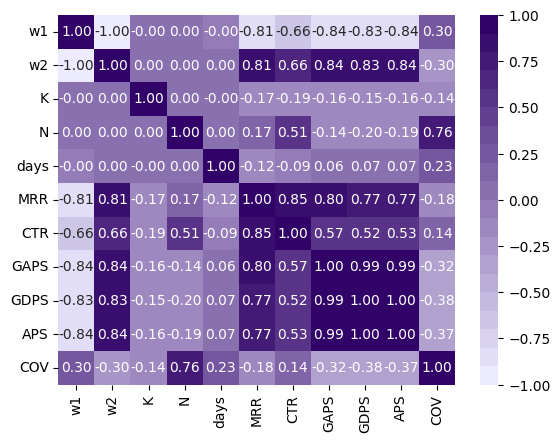

In [34]:
correlation_matrix = H[['w1','w2', 'K','N', 'days', 'MRR', 'CTR', 'GAPS', 'GDPS', 'APS','COV']].corr()

sns.heatmap(correlation_matrix, cmap=gradient_colors, annot=True, cbar=True, fmt='.2f')


In [57]:
correlation_matrix.to_csv('data/evaluations/correlation_matrix.csv')

In [39]:
all_runs

,Model,Method,w1,w2,K,N,MAP,MRR,CTR,missing_bridges,missing_cf,not_enough_bridges,not_enough_cf,GDPS,GAPS,APS,COV,days
0,reranker,frequencyScoreNormalizedLog2,0.7,0.3,20,20,0.004109,0.011161,0.039749,4106,0,8996,0,0.075239,0.093490,0.074070,0.483489,30
1,reranker,frequencyScoreNormalizedLog2,0.3,0.7,100,20,0.030303,0.104378,0.386807,4106,0,41232,0,0.174863,0.191221,0.175419,0.292779,30
2,reranker,frequencyScore,0.9,0.1,50,20,0.004491,0.010665,0.046809,4106,0,22137,0,0.081952,0.099784,0.080282,0.474325,30
3,reranker,frequencyScoreNormalizedLog2,0.1,0.9,50,20,0.041746,0.234072,0.545252,4106,0,22137,0,0.202209,0.221611,0.205652,0.305261,30
4,reranker,frequencyScoreNormalizedLog2,0.3,0.7,50,1,0.081305,0.056747,0.056747,4106,0,22137,0,0.315626,0.303524,0.314240,0.171591,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,bridges,frequencyScore,0.0,0.0,100,5,0.093597,0.189815,0.307726,0,0,0,0,0.398734,0.429644,0.389058,0.406699,180
191,reranker,frequencyScore,0.9,0.1,20,1,0.005390,0.002841,0.002841,0,0,5174,0,0.084256,0.086848,0.082377,0.224364,180
192,reranker,frequencyScoreNormalizedLog2,0.7,0.3,100,1,0.011022,0.006192,0.006192,0,0,14093,0,0.130265,0.134004,0.127268,0.225786,180
193,cf,not_used,1.0,0.0,50,1,0.005272,0.002772,0.002772,0,0,0,0,0.082057,0.084543,0.080203,0.224048,180
